<a href="https://colab.research.google.com/github/vikasnain6353/ai-ml-intern/blob/main/task_1_aiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("Titanic").getOrCreate()

# Read the CSV file
df = spark.read.csv('/content/Titanic-Dataset.csv', header=True, inferSchema=True)
display(df)

DataFrame[PassengerId: int, Survived: int, Pclass: int, Name: string, Sex: string, Age: double, SibSp: int, Parch: int, Ticket: string, Fare: double, Cabin: string, Embarked: string]

In [3]:
df=df.toPandas()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"""Johnston, Miss. Catherine Helen """"Carrie""""""",female,NaN,1,2,W./C. 6607,23.4500,None,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Descriptive statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int32  
 1   Survived     891 non-null    int32  
 2   Pclass       891 non-null    int32  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int32  
 7   Parch        891 non-null    int32  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(5), object(5)
memory usage: 66.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Fill missing values in Age with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing values in Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column
df.drop(columns=['Cabin'], inplace=True)

# Check again for missing values
df.isnull().sum()


/tmp/ipython-input-3129926782.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3129926782.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [7]:
import numpy as np
import pandas as pd


# Log transformation of Fare
df['Fare'] = df['Fare'].apply(lambda x: np.log(x) if x > 0 else 0)

# Convert Sex to binary
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
# One-hot encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,0.683603,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,1.450832,False,False
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,0.727559,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,1.379314,False,True
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,0.735091,False,True


In [8]:
# Extract titles from the Name column
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
# Simplify titles
df['Title'] = df['Title'].replace(['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

# Map titles to numeric values
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
df['Title'] = df['Title'].map(title_mapping)
df['Title'] = df['Title'].fillna(0)


# Create Family Size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Create IsAlone feature
df['IsAlone'] = 1  # Initialize to 1 (Alone)
df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # If FamilySize > 1, not alone

/tmp/ipython-input-119381774.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['IsAlone'].loc[df['FamilySize'] > 1] = 0  # If FamilySize > 1, not alone
/tmp/ipython-input-119381774.py:19: SettingWithCopyWarning: 
A value is trying to b

In [9]:
# Drop Name, Ticket, and PassengerId columns
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,0,3,NaN,22.0,1,0,0.683603,False,True,1.0,2,0
1,1,1,NaN,38.0,1,0,1.450832,False,False,3.0,2,0
2,1,3,NaN,26.0,0,0,0.727559,False,True,2.0,1,1
3,1,1,NaN,35.0,1,0,1.379314,False,True,3.0,2,0
4,0,3,NaN,35.0,0,0,0.735091,False,True,1.0,1,1


In [10]:
# Select the relevant features
selected_features = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S', 'Title', 'FamilySize', 'IsAlone']
df = df[selected_features]

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,0,3,NaN,22.0,1,0,0.683603,False,True,1.0,2,0
1,1,1,NaN,38.0,1,0,1.450832,False,False,3.0,2,0
2,1,3,NaN,26.0,0,0,0.727559,False,True,2.0,1,1
3,1,1,NaN,35.0,1,0,1.379314,False,True,3.0,2,0
4,0,3,NaN,35.0,0,0,0.735091,False,True,1.0,1,1


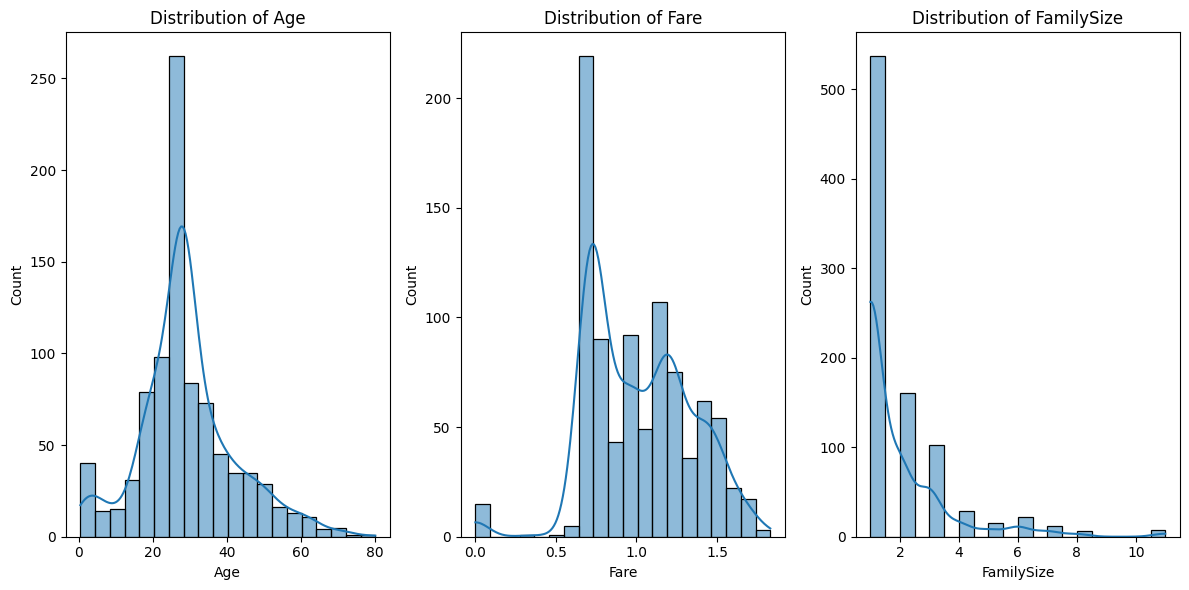

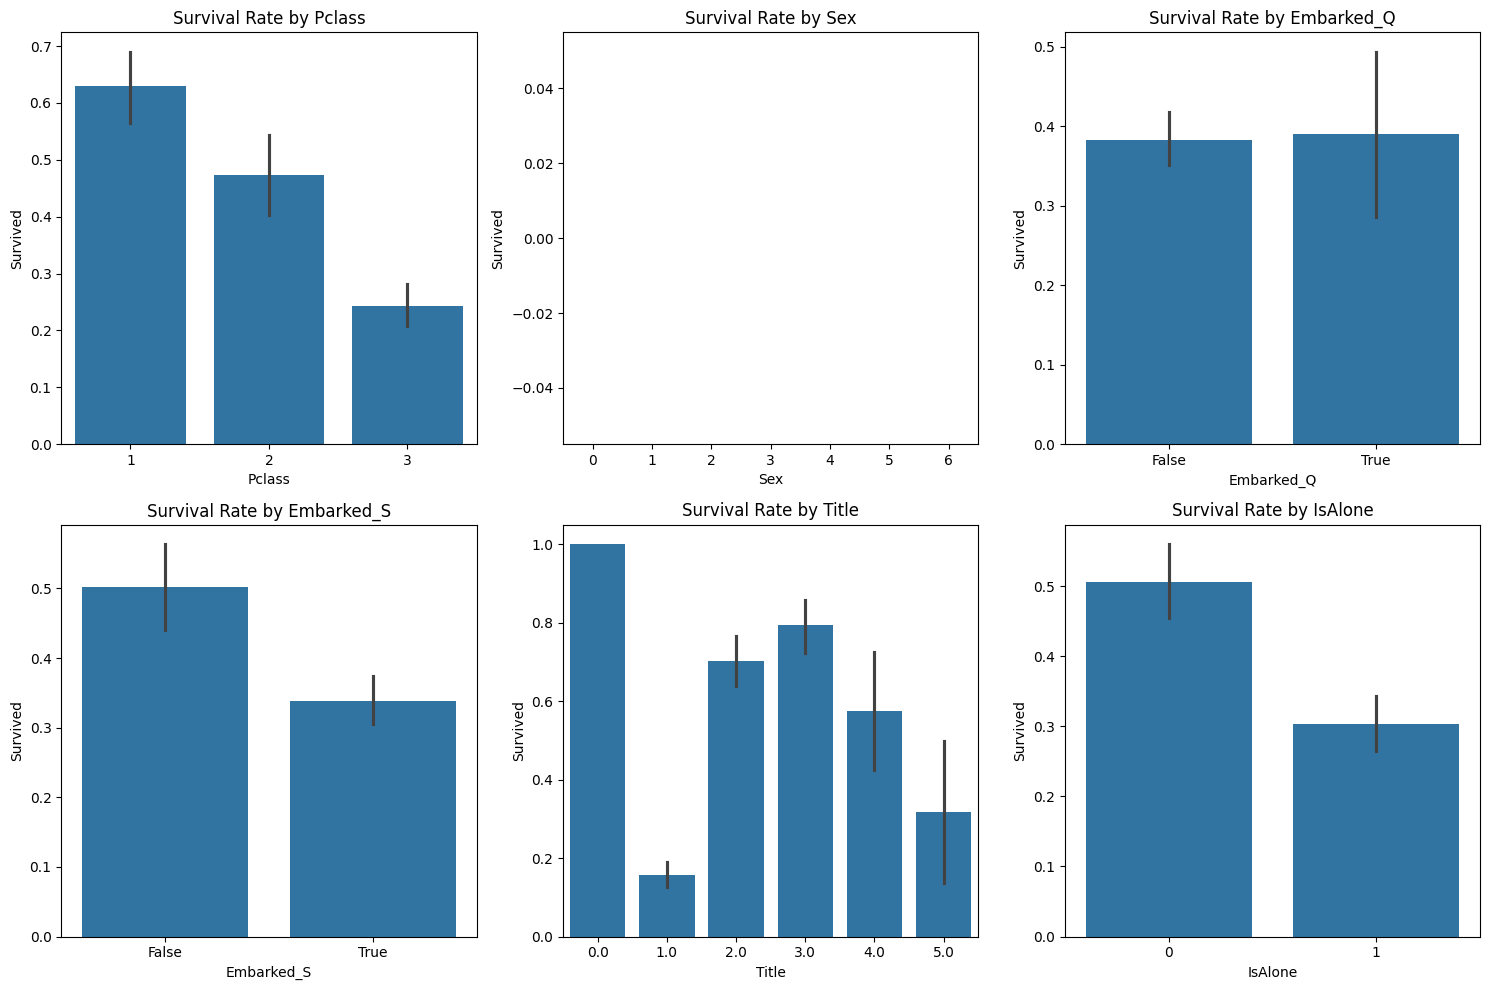

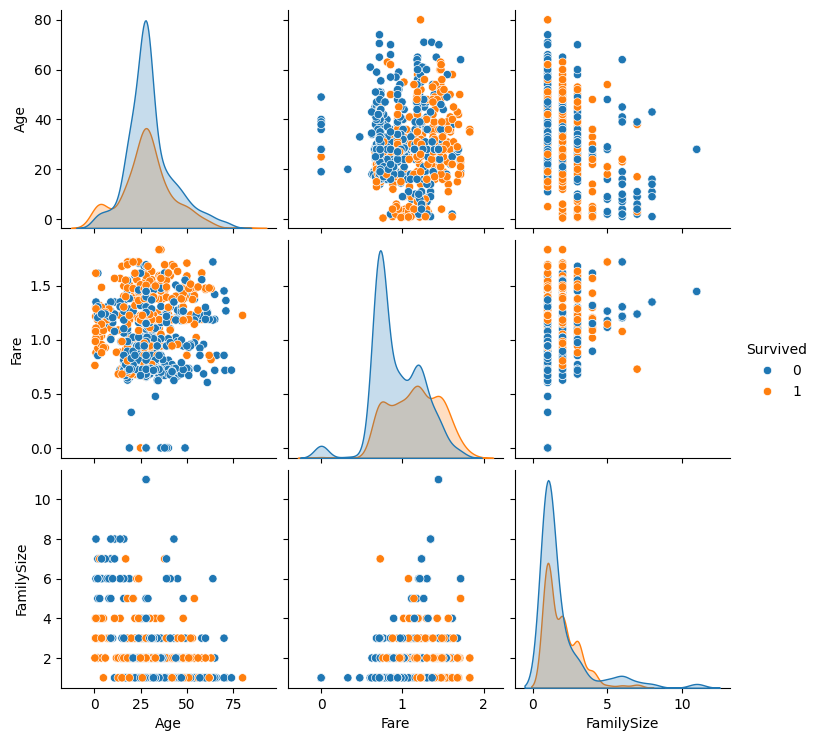

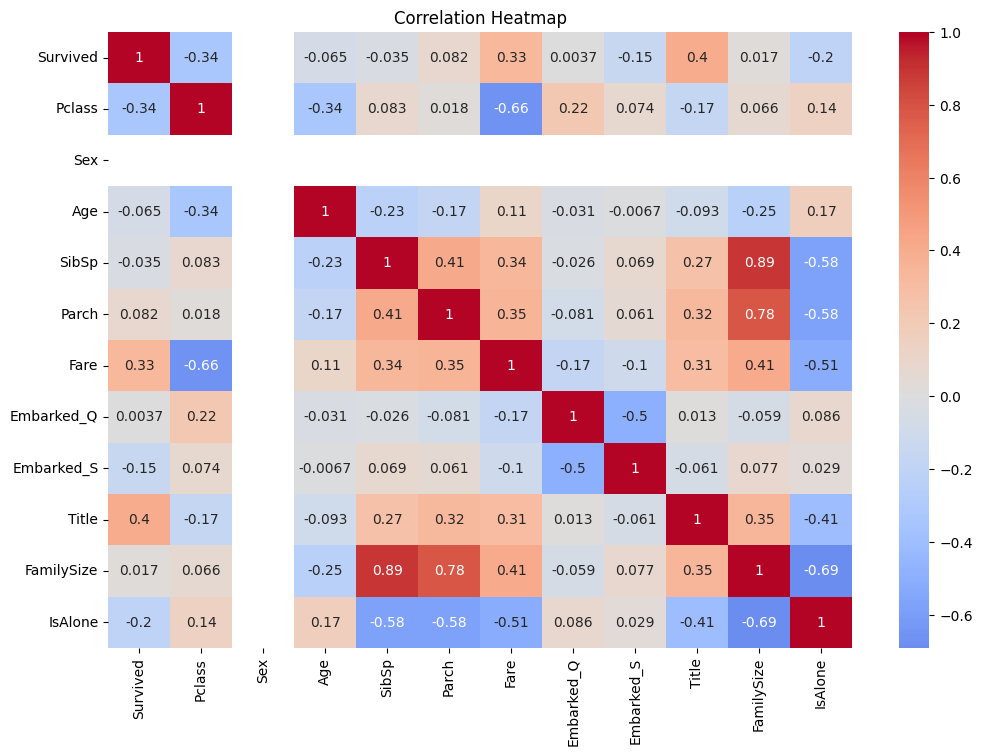

In [11]:
# Set up the matplotlib figure
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distributions for numerical features
plt.figure(figsize=(12, 6))
numerical_features = ['Age', 'Fare', 'FamilySize']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

# Plot survival rate by categorical features
plt.figure(figsize=(15, 10))
categorical_features = ['Pclass', 'Sex', 'Embarked_Q', 'Embarked_S', 'Title', 'IsAlone']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=feature, y='Survived', data=df)
    plt.title(f'Survival Rate by {feature}')

plt.tight_layout()
plt.show()

# Pairplot of numerical features colored by survival
sns.pairplot(df[['Survived', 'Age', 'Fare', 'FamilySize']], hue='Survived', height=2.5)
plt.show()

# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


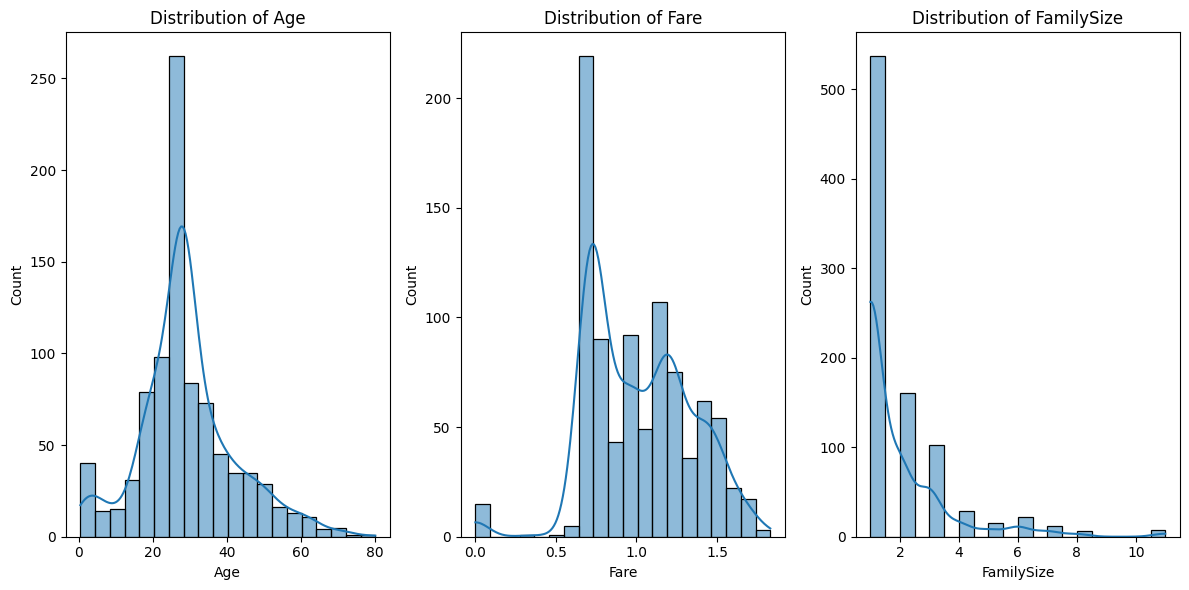

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Plot distributions for numerical features
numerical_features = ['Age', 'Fare', 'FamilySize']
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


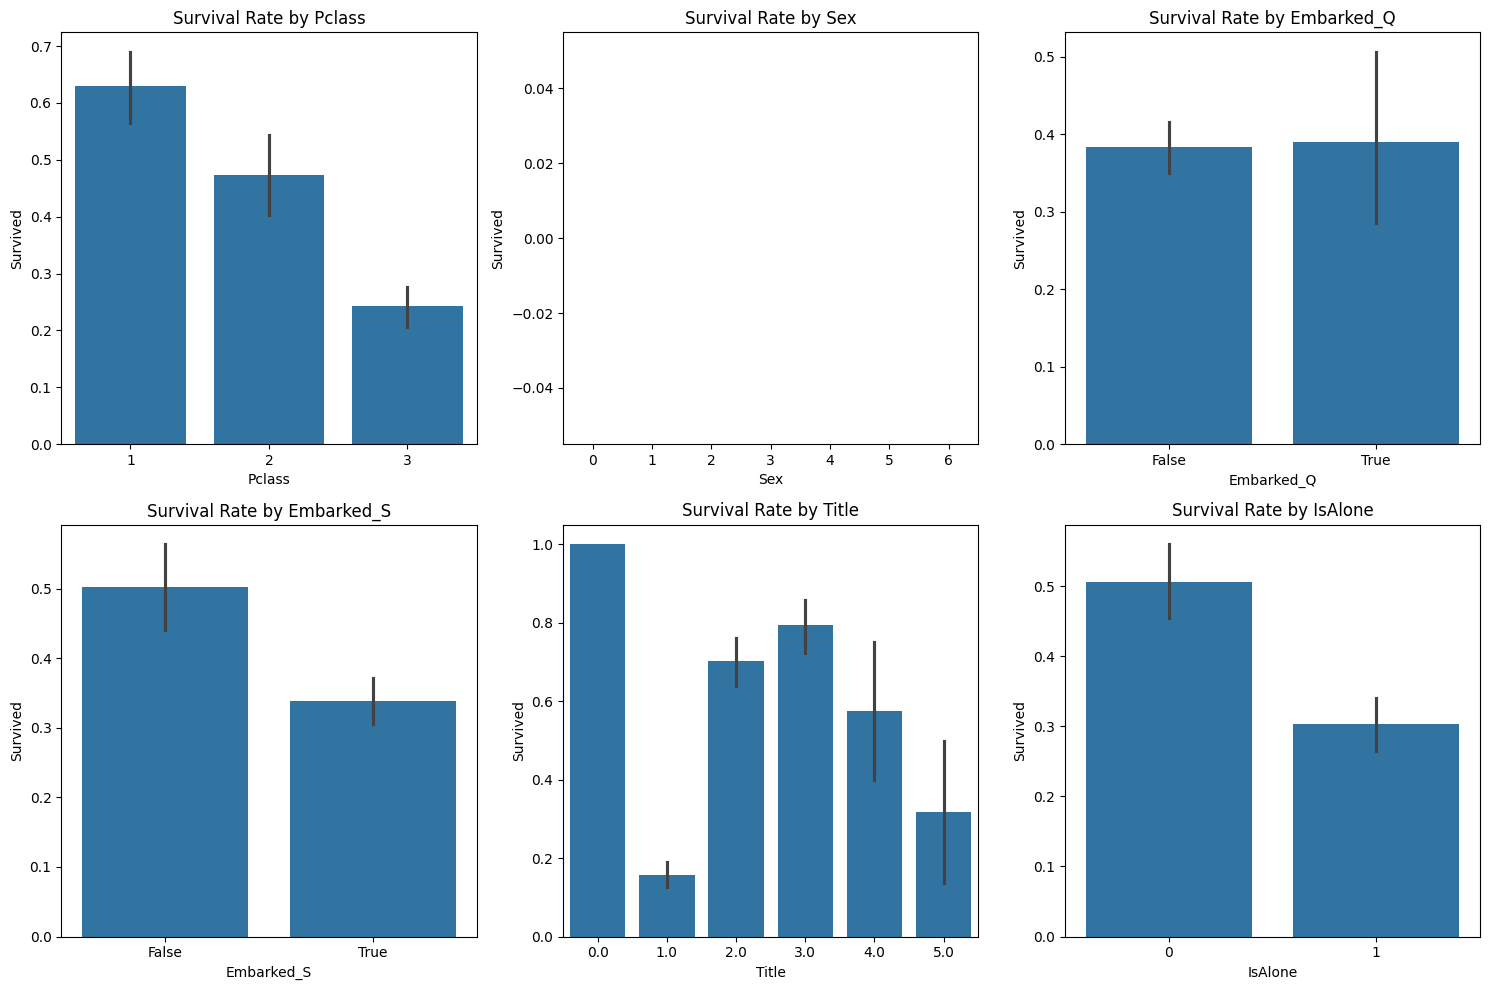

In [13]:
# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Plot survival rate by categorical features
categorical_features = ['Pclass', 'Sex', 'Embarked_Q', 'Embarked_S', 'Title', 'IsAlone']
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x=feature, y='Survived', data=df)
    plt.title(f'Survival Rate by {feature}')

plt.tight_layout()
plt.show()


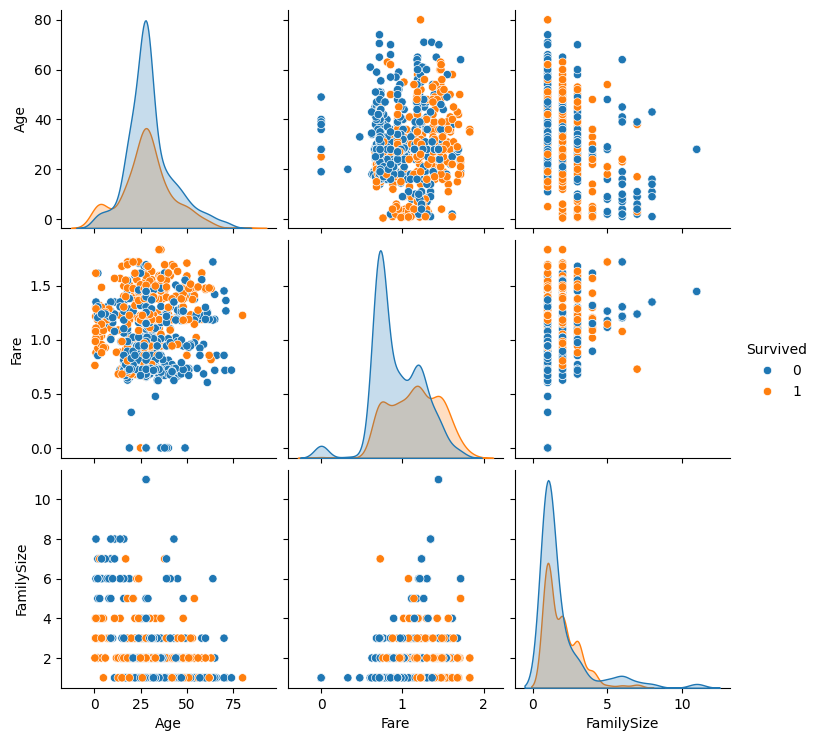

In [14]:
# Pairplot of numerical features colored by survival
sns.pairplot(df[['Survived', 'Age', 'Fare', 'FamilySize']], hue='Survived', height=2.5)
plt.show()


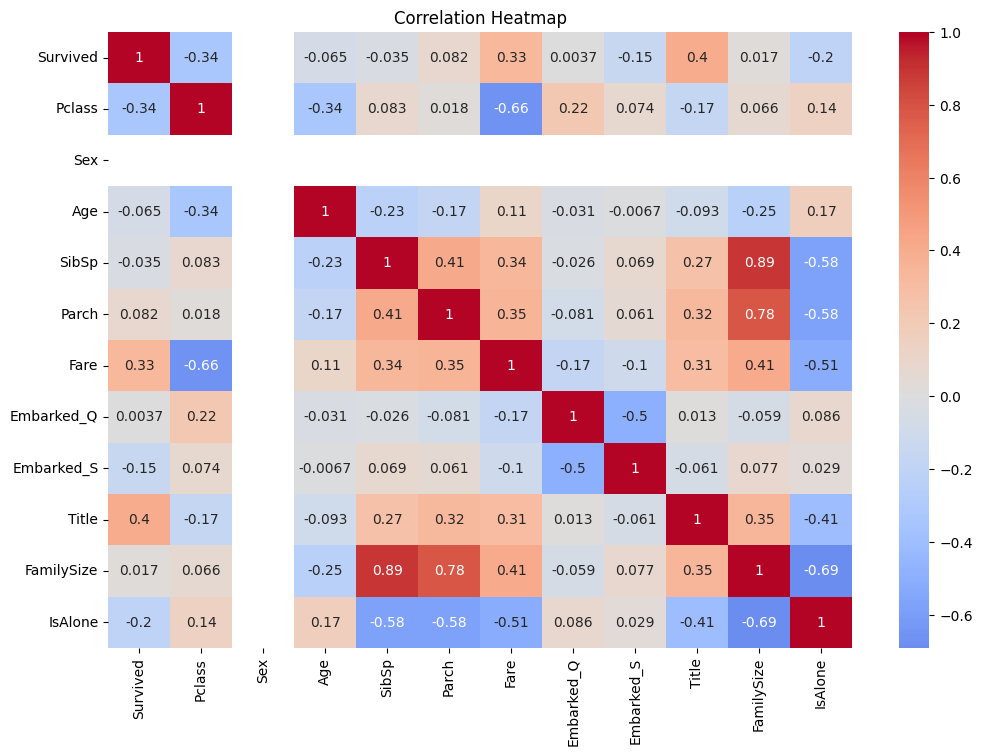

In [15]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
0,0,3,NaN,22.0,1,0,0.683603,False,True,1.0,2,0
1,1,1,NaN,38.0,1,0,1.450832,False,False,3.0,2,0
2,1,3,NaN,26.0,0,0,0.727559,False,True,2.0,1,1
3,1,1,NaN,35.0,1,0,1.379314,False,True,3.0,2,0
4,0,3,NaN,35.0,0,0,0.735091,False,True,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,NaN,27.0,0,0,0.941939,False,True,5.0,1,1
887,1,1,NaN,19.0,0,0,1.224128,False,True,2.0,1,1
888,0,3,NaN,28.0,1,2,1.148947,False,True,2.0,4,0
889,1,1,NaN,26.0,0,0,1.224128,False,False,1.0,1,1
